In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
import matplotlib.pyplot as plt

np.random.seed(100)
LEVEL = 'level_4a'


In [2]:
class SigmoidNeuron1:
    def __init__(self):
        self.w = None
        self.b = None  
    def sigmoid(self,X):
        return 1/(1+np.exp(-X))
    def forward_prop(self,X):
        #print("forwar_prop",X.shape,self.w.shape,self.b,self.sigmoid(np.dot (X,self.w) + self.b).shape)
        return self.sigmoid(np.dot (X,self.w) + self.b)
    def backward_prop(self,X,Y):
        m = X.shape[0]
        #print(self.forward_prop(X).shape,Y.reshape(-1,1).shape)
        dz = self.forward_prop(X) -Y.reshape(-1,1) 
        #print("dz X",dz.shape,X.shape,type(dz))
        db = 1/m*np.sum(dz)
        dw = 1/m*np.dot(X.T,dz)
        #print("dw db",dw.shape,db)
        return dw,db
    def loss(self,y,y_predict):
        m=y.shape[0]
        y=y.reshape(-1,1)
        print(y.shape)
        #print(y_predict)
        for i,j,k in zip(y,y_predict,(y*np.log(y_predict)+(1-y)*np.log(1-y_predict))):
            print(i,j,k)
            print(i*np.log(j))
            print(1-i,np.log(1-j),(1-i)*np.log(1-j))
        print((y*np.log(y_predict)+(1-y)*np.log(1-y_predict)))
        return -1/m*np.sum(y*np.log(y_predict)+(1-y)*np.log(1-y_predict))
    def update(self,dw,db,learning_rate):
        
        self.w  = self.w -learning_rate* dw
        self.b  = self.b -learning_rate* db 
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse",display_loss=False):
        loss_list =[]
        if(initialise):
            self.w = np.zeros((X.shape[1],1))
            self.b = 0
            dw     = 0
            db     = 0
            best_w = 0
            best_b = 0
            best_acc =0
        for iter1 in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):    
        #for iter1 in range(epochs):
                y_predict = self.forward_prop(X)
                #print(learning_rate)
                if((iter1+1)%1000==0):
                    learning_rate =learning_rate*0.8
                    print(learning_rate)    
                dw,db = self.backward_prop(X,Y)
                self.update(dw,db,learning_rate)
                y_predict = self.forward_prop(X)
                loss_list.append(log_loss(Y,y_predict))
                y_predict =(y_predict>= 0.5).astype(int)
                accuracy = accuracy_score(y_predict,Y.reshape(-1,1))
                if(accuracy>=best_acc):
                    best_acc = accuracy
                    best_w   = self.w
                    best_b   = self.b
        self.w   = best_w
        self.b   = best_b
                #print(y_predict)
        if display_loss:
            print(loss_list)
            print("w,b",self.w,self.b)
            plt.plot(loss_list)
            plt.xlabel('Epochs')
            plt.ylabel('Log Loss')
            plt.show()
    def predict(self,X):
        return self.forward_prop(X)         

In [3]:
def read_all(folder_path, key_prefix=""):
    '''
    It returns a dictionary with 'file names' as keys and 'flattened image arrays' as values.
    '''
    print("Reading:")
    images = {}
    files = os.listdir(folder_path)
    print(folder_path)
    print (files)
    for i, file_name in tqdm_notebook(enumerate(files), total=len(files)):
        file_path = os.path.join(folder_path, file_name)
        image_index = key_prefix + file_name[:-4]
        image = Image.open(file_path)
        image = image.convert("L")
        #thresh2 =
        img        = cv2.imread(file_path)
        image   =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret,thresh2 = cv2.threshold(image,10,255,cv2.THRESH_BINARY_INV)
        images[image_index] = np.array(thresh2.copy()).flatten()
        #image.close()
    return images

In [4]:
LEVEL = 'level_4a'
languages = ['ta', 'hi', 'en']
import cv2
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
import cv2
def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-15, 15)
    return sk.transform.rotate(image_array, random_degree)



def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]


images_train = read_all("../input/"+ LEVEL+ "_train/" +LEVEL+"/"+"background", key_prefix='bgr_') # change the path
for language in languages:
   images_train.update(read_all("../input/"+ LEVEL+ "_train/" +LEVEL+"/"+language, key_prefix=language+"_" ))

print(len(images_train))

images_test = read_all("../input/"+ LEVEL+ "_test/" +"kaggle_"+LEVEL, key_prefix='')

Reading:
../input/level_4a_train/level_4a/background
['idx899_door_40.jpg', 'idx1189_door_14.jpg', 'idx620_fabric_37_d2.jpg', 'idx438_fabric_18_d2.jpg', 'idx148_fabric_18.jpg', 'idx359_dressingCase_7_d3.jpg', 'idx325_envelope_5_d3.jpg', 'idx1266_tent_13_d2.jpg', 'idx364_mountain_8.jpg', 'idx21_fabric_38_d2.jpg', 'idx1335_fabric_6_d2.jpg', 'idx1162_door_29.jpg', 'idx292_wall_12_d2.jpg', 'idx413_wall_8_d2.jpg', 'idx135_fabric_37_d3.jpg', 'idx1037_dressingCase_6.jpg', 'idx372_mountain_20.jpg', 'idx500_displayPanel_2_d2.jpg', 'idx409_mountain_1_d3.jpg', 'idx1465_fabric_2_d2.jpg', 'idx1070_fabric_1_d3.jpg', 'idx941_mountain_11_d3.jpg', 'idx894_mountain_12_d2.jpg', 'idx197_door_8.jpg', 'idx115_tent_6_d2.jpg', 'idx78_tent_0_d2.jpg', 'idx317_wall_17_d3.jpg', 'idx887_dressingCase_4_d3.jpg', 'idx368_tent_5.jpg', 'idx748_tent_0.jpg', 'idx654_fabric_36.jpg', 'idx40_door_2.jpg', 'idx1179_fabric_29_d3.jpg', 'idx1145_door_1_d2.jpg', 'idx943_envelope_11.jpg', 'idx752_door_4.jpg', 'idx800_envelope_9_d3


Reading:
../input/level_4a_train/level_4a/ta
['idx1444_mountain_0_c64_6.jpg', 'idx732_fabric_1_c56_10.jpg', 'idx660_mountain_7_c78_13.jpg', 'idx912_dressingCase_4_c3_14.jpg', 'idx821_mountain_3_c46_11.jpg', 'idx1296_door_4_c26_6.jpg', 'idx1210_wall_4_c26_0.jpg', 'idx163_door_38_c6_7.jpg', 'idx1246_door_26_c25_12.jpg', 'idx1396_door_32_c75_11.jpg', 'idx1121_wall_8_c20_7.jpg', 'idx1350_mountain_6_c8_13.jpg', 'idx666_wall_7_c50_10.jpg', 'idx556_fabric_25_c48_11.jpg', 'idx773_mountain_5_c23_4.jpg', 'idx1175_door_27_c81_7.jpg', 'idx105_mountain_20_c10_11.jpg', 'idx699_fabric_25_c67_12.jpg', 'idx959_door_10_c53_5.jpg', 'idx30_fabric_5_c30_3.jpg', 'idx1010_wall_12_c81_0.jpg', 'idx588_mountain_9_c71_8.jpg', 'idx1487_fabric_14_c53_14.jpg', 'idx1067_envelope_4_c27_14.jpg', 'idx1062_door_27_c65_14.jpg', 'idx1138_door_3_c2_2.jpg', 'idx709_wall_5_c12_5.jpg', 'idx211_door_23_c86_3.jpg', 'idx1438_tent_0_c59_4.jpg', 'idx875_displayPanel_2_c22_11.jpg', 'idx123_door_18_c23_5.jpg', 'idx1387_wall_8_c62_1


Reading:
../input/level_4a_train/level_4a/hi
['idx1067_envelope_4_c10_24.jpg', 'idx318_door_4_c10_25.jpg', 'idx160_wall_14_c3_12.jpg', 'idx739_door_3_c11_1.jpg', 'idx1313_mountain_0_c5_41.jpg', 'idx610_fabric_30_c1_10.jpg', 'idx759_mountain_20_c1_93.jpg', 'idx77_door_21_c4_88.jpg', 'idx510_wall_3_c0_3.jpg', 'idx358_displayPanel_7_c10_72.jpg', 'idx908_tent_6_c9_24.jpg', 'idx1485_fabric_34_c1_51.jpg', 'idx1490_door_10_c3_13.jpg', 'idx580_dressingCase_1_c1_21.jpg', 'idx29_dressingCase_5_c0_1.jpg', 'idx1075_tent_13_c5_32.jpg', 'idx1337_door_17_c10_0.jpg', 'idx55_envelope_9_c6_48.jpg', 'idx1204_tent_4_c9_82.jpg', 'idx19_door_29_c11_64.jpg', 'idx1183_mountain_7_c7_69.jpg', 'idx1435_envelope_4_c10_20.jpg', 'idx132_mountain_1_c7_12.jpg', 'idx1009_fabric_30_c2_90.jpg', 'idx1316_fabric_32_c5_1.jpg', 'idx557_displayPanel_7_c9_99.jpg', 'idx978_mountain_18_c7_51.jpg', 'idx687_wall_9_c3_47.jpg', 'idx195_door_14_c8_79.jpg', 'idx39_mountain_12_c7_20.jpg', 'idx440_mountain_4_c0_38.jpg', 'idx1177_fabri


Reading:
../input/level_4a_train/level_4a/en
['idx214_fabric_13_c20_214.jpg', 'idx273_envelope_15_c26_273.jpg', 'idx566_door_0_c18_566.jpg', 'idx329_wall_14_c26_329.jpg', 'idx1129_fabric_30_c7_1129.jpg', 'idx54_dressingCase_0_c40_54.jpg', 'idx356_door_22_c21_356.jpg', 'idx1485_fabric_34_c47_1485.jpg', 'idx22_tent_1_c44_22.jpg', 'idx1306_displayPanel_1_c39_1306.jpg', 'idx133_fabric_3_c18_133.jpg', 'idx1179_wall_8_c51_1179.jpg', 'idx818_envelope_0_c5_818.jpg', 'idx377_mountain_15_c2_377.jpg', 'idx600_tent_9_c32_600.jpg', 'idx455_envelope_4_c36_455.jpg', 'idx1052_wall_9_c46_1052.jpg', 'idx652_door_19_c41_652.jpg', 'idx665_tent_2_c25_665.jpg', 'idx141_dressingCase_0_c1_141.jpg', 'idx1181_displayPanel_0_c21_1181.jpg', 'idx1405_door_11_c21_1405.jpg', 'idx373_door_23_c32_373.jpg', 'idx208_mountain_3_c41_208.jpg', 'idx298_mountain_20_c37_298.jpg', 'idx713_fabric_10_c4_713.jpg', 'idx660_mountain_7_c20_660.jpg', 'idx265_fabric_13_c2_265.jpg', 'idx12_fabric_5_c9_12.jpg', 'idx621_wall_4_c19_621.j


9000
Reading:
../input/level_4a_test/kaggle_level_4a
['2562.jpg', '2864.jpg', '1441.jpg', '2051.jpg', '1111.jpg', '2184.jpg', '1436.jpg', '2546.jpg', '2166.jpg', '145.jpg', '2684.jpg', '1912.jpg', '2981.jpg', '1313.jpg', '672.jpg', '1765.jpg', '2292.jpg', '2713.jpg', '388.jpg', '1256.jpg', '406.jpg', '1152.jpg', '2637.jpg', '408.jpg', '774.jpg', '1593.jpg', '670.jpg', '2639.jpg', '2377.jpg', '491.jpg', '1517.jpg', '716.jpg', '531.jpg', '1732.jpg', '668.jpg', '1584.jpg', '2066.jpg', '1901.jpg', '34.jpg', '2894.jpg', '1651.jpg', '2734.jpg', '482.jpg', '2895.jpg', '941.jpg', '2820.jpg', '2935.jpg', '2239.jpg', '1090.jpg', '688.jpg', '1070.jpg', '2674.jpg', '2430.jpg', '1163.jpg', '2832.jpg', '2501.jpg', '2732.jpg', '696.jpg', '1580.jpg', '1604.jpg', '535.jpg', '2372.jpg', '90.jpg', '1760.jpg', '1826.jpg', '2721.jpg', '529.jpg', '860.jpg', '1231.jpg', '835.jpg', '1644.jpg', '1546.jpg', '569.jpg', '1735.jpg', '2675.jpg', '261.jpg', '2946.jpg', '2056.jpg', '2603.jpg', '578.jpg', '48.jpg', '

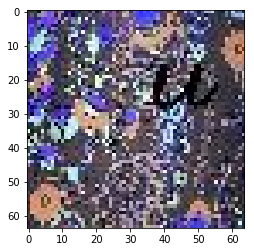

In [5]:
import glob
import cv2

img = [cv2.imread(file) for file in glob.glob("../input/level_4a_train/level_4a/en/*")]
plt.imshow(img[0])

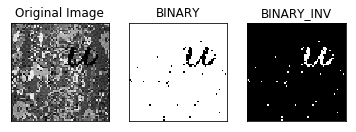

In [6]:

#retval,mask_img = cv2.threshold("../input/level_4a_train/level_4a/ta/idx1132_fabric_19_d3.jpg", 255, 255, cv2.THRESH_BINARY)
img1          =  cv2.cvtColor(img[0], cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(img1,10,255,cv2.THRESH_BINARY)



ret,thresh2 = cv2.threshold(img1,10,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img1,0,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img1,0,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img1,0,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img1, thresh1, thresh2, thresh3, thresh4, thresh5]

#plt.imshow(thresh1,'gray')
#plt.imshow(thresh2,'gray')
#plt.imshow(thresh3,'gray')
#plt.imshow(thresh4,'gray')
#plt.imshow(thresh5,'gray')
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [7]:
list(images_test.keys())[:5]

['2562', '2864', '1441', '2051', '1111']

In [8]:
X_train = []
Y_train = []
for key, value in images_train.items():
    X_train.append(value)
    
    if key[:4] == "bgr_":
        Y_train.append(0)
    else:
        Y_train.append(1)

ID_test = []
X_test = []
for key, value in images_test.items():
  ID_test.append(int(key))
  X_test.append(value)
  
#print("X_train[0]",X_train[0])
X_train = np.array(X_train)/255
print(np.sort(X_train))
#print(X_train)
#print(horizontal_flip(X_train))
X_train = np.vstack((X_train,horizontal_flip(X_train),horizontal_flip(X_train)))
Y_train = np.array(Y_train)
Y_train = np.hstack((Y_train,Y_train,Y_train))
X_test = np.array(X_test)/255
#print(Y_train)
print(X_train.shape, Y_train.shape)
print(X_test.shape)

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
(27000, 4096) (27000,)
(3000, 4096)


In [9]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
print(np.sort(X_scaled_train))

[[-0.34662088 -0.33456654 -0.32934084 ...  5.24223356  5.33628921
   5.52648678]
 [-0.34662088 -0.33456654 -0.32934084 ...  4.91321329  4.93478598
   5.19136885]
 [-0.34662088 -0.33456654 -0.32934084 ...  5.33628921  5.44490515
   5.77126475]
 ...
 [-0.34662088 -0.33456654 -0.32934084 ...  5.23937029  5.2769455
   5.54996578]
 [-0.34662088 -0.33456654 -0.32934084 ...  5.63269675  6.01156611
   6.04152299]
 [-0.34662088 -0.33456654 -0.32934084 ...  4.78917218  4.83634613
   4.84319334]]


In [10]:
#sn_mse = SigmoidNeuron1()
#sn_mse.fit(X_scaled_train, Y_train, epochs=1000, learning_rate=0.005, loss_fn="mse", display_loss=True)

In [11]:
#sn_mse = SigmoidNeuron1()
#sn_mse.fit(X_scaled_train, Y_train, epochs=4000, learning_rate=0.012, loss_fn="ce", display_loss=True)

In [12]:
#sn_mse = SigmoidNeuron1()
#sn_mse.fit(X_scaled_train, Y_train, epochs=8000, learning_rate=0.015, loss_fn="ce", display_loss=True)

In [13]:


from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=2,shuffle=True) # Define the split - into 10 folds 
kf.get_n_splits(X_scaled_train) # returns the number of splitting iterations in the cross-validator
#print(kf) 


def cross_validation(learning_rate,epochs):
    acc =[]
    for train_index, test_index in kf.split(X_scaled_train):
        #print(train_index,test_index)
        sn_ce = SigmoidNeuron1()
        sn_ce.fit(X_scaled_train[train_index], Y_train[train_index], epochs=epochs, learning_rate=learning_rate, loss_fn="ce", display_loss=True)
        Y_pred_binarised_train = (sn_ce.predict(X_scaled_train[test_index])>= 0.5).astype("int").ravel()
        accuracy_test = accuracy_score(Y_pred_binarised_train, Y_train[test_index])
        acc.append(accuracy_test)
    print(acc)
    accuracy =sum(acc)/len(acc)
    return accuracy



In [14]:
#epochs_list =[8000,10000]
#lr_rate_list =[0.015,0.025]
#acc_dic ={}

#for epoch in epochs_list:
#    for lr_rate in lr_rate_list:
#        acc_dic[(epoch,lr_rate)] = cross_validation(lr_rate,epoch)

#print(acc_dic)

In [15]:
#epochs_list =[1000,3000]
#lr_rate_list =[0.030,0.035]
#acc_dic ={}

#for epoch in epochs_list:
#    for lr_rate in lr_rate_list:
#        acc_dic[(epoch,lr_rate)] = cross_validation(lr_rate,epoch)

#print(acc_dic)

In [16]:
#sn_ce = SigmoidNeuron1()
#best_epoch   = 7000
#best_lr_rate = 0.0005
#sn_ce.fit(X_scaled_train, Y_train, epochs=best_epoch, learning_rate=best_lr_rate, loss_fn="ce", display_loss=True)
#Y_pred_binarised_train = (sn_ce.predict(X_scaled_train)>= 0.5).astype("int").ravel()


0.024
0.019200000000000002
0.015360000000000002
0.012288000000000002

[0.39730097964284833, 0.32865034362881046, 0.2967783824713638, 0.2787029628334301, 0.26553652290792873, 0.25518157377958434, 0.2466479827696779, 0.23940089951159094, 0.23312137212563208, 0.2276030835968222, 0.22270133524644475, 0.21830751315429492, 0.21433669302783684, 0.21072132434895774, 0.2074073319737147, 0.20435123175586165, 0.201517859797493, 0.19887858998451102, 0.19640995280555812, 0.19409257077543562, 0.19191033444959882, 0.18984975724180733, 0.18789946218104758, 0.18604976701286227, 0.18429234500047117, 0.18261994723684435, 0.18102617806505225, 0.17950531823381952, 0.17805219100001796, 0.1766620653932948, 0.17533058947292768, 0.1740537456683615, 0.1728278206745117, 0.171649383722502, 0.17051526885970103, 0.16942255862758837, 0.1683685678967568, 0.16735082751066105, 0.16636706786548136, 0.16541520273708807, 0.16449331367940234, 0.16359963525224477, 0.1627325412472585, 0.1618905319967881, 0.16107222278433325,

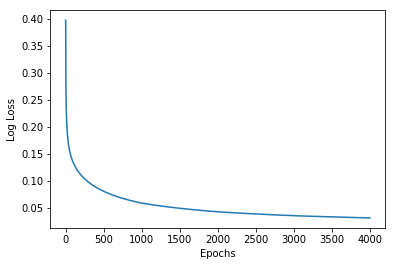

In [17]:

sn_ce = SigmoidNeuron1()
best_epoch   = 4000
best_lr_rate = 0.03
sn_ce.fit(X_scaled_train, Y_train, epochs=best_epoch, learning_rate=best_lr_rate, loss_fn="ce", display_loss=True)
Y_pred_binarised_train = (sn_ce.predict(X_scaled_train)>= 0.5).astype("int").ravel()

In [18]:
def print_accuracy(sn):
  Y_pred_train = sn.predict(X_scaled_train)
  Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
  accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
  print("Train Accuracy : ", accuracy_train)
  print("-"*50)

In [19]:
#print_accuracy(sn_mse)
print_accuracy(sn_ce)

Train Accuracy :  0.9924814814814815
--------------------------------------------------


## Sample Submission

In [20]:
Y_pred_test = sn_ce.predict(X_scaled_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()

submission = {}
submission['ImageId'] = ID_test
submission['Class'] = Y_pred_binarised_test

submission = pd.DataFrame(submission)
submission = submission[['ImageId', 'Class']]
submission = submission.sort_values(['ImageId'])
submission.to_csv("submisision.csv", index=False)

In [21]:
!pwd


/kaggle/working
